# LG
# Day1 Lab : Fundamentals of DSP for Audio/Music



---


# 1.   Sinusoids

Write a function that generates a sine wave. Your function should take four parameters as an input – peak amplitude, frequency in Hz, initial phase in radians, duration in seconds, and the sampling frequency in Hz – and output a sinusoidal wave as a vector. The syntax of your function should look like:


In [0]:
import numpy as np

def sinewave(amp,freq,phs,dur,fs):

    # Put your comments here to describe your function – what it does, what are the input arguments, etc.

    # !!!! your code here !!!!
    
    return y


Generate a few sinusoids with different amplitudes, frequencies, phases, durations, and/or sampling rate, and listen to them using IPython.display module

In [0]:
import IPython.display as ipd

# !!!! your code here !!!!




---


# 2.   Additive synthesis


Fourier theorem says any periodic signal can be described by a sum of sinusoids. Google the following periodic waves to find out how to synthesize them using sinusoids with different amplitudes, frequencies and phases. Write a python script to generate them using the function from the previous problem. Try different number of sinusoids ($ N = 5,10,30,100 $) and save each sound as a waveform using librosa.output.write_wav.



*   a. Square wave (square_N5.wav, square_N10.wav, square_N30.wav, square_N100.wav)
*   b. Triangle wave (triangle_N5.wav, triangle_N10.wav, triangle_N30.wav, triangle_N100.wav)
*   c. Sawtooth wave (sawtooth_N5.wav, sawtooth_N10.wav, sawtooth_N30.wav, sawtooth_N100.wav)


You should use the fundamental frequency $ f_0 = 440 $ Hz, and your sounds should be 1 second long. Plot the first five periods of three waves in one figure using matplotlib.pyplot.subplot. In each plot, display all four waves (with different number of sinusoids) in different colors and denote which uses how many sinusoids. You should save your sound files and plots, and include them in your submission.

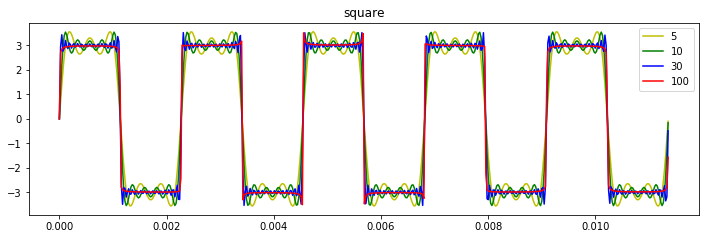

In [8]:
import numpy as np
import librosa
from matplotlib import pyplot as plt
import os


def sinewave(amp,freq,phs,dur,fs):
    ### Consuit the code from lab1.ipynb
    T = 1 / fs
    y = amp * np.sin(2 * np.pi * freq * np.arange(0, dur, T) + phs)
    return y

N_list = [5, 10, 30, 100]
fs = 44100
f0 = 440
dur = 2
print_dur = int(5 / f0 * fs + 1)
phs = 0
amp = 3
color = ['y-','g-','b-','r-']
wave = ['square']
#wave = ['Square','Triangle','Sawtooth']

if not os.path.exists('result'):
    os.mkdir('result')
    
plt.figure(figsize=(12,12))
ax = list()
ax.append(plt.subplot(3,1,1))
#ax.append(plt.subplot(3,1,2))
#ax.append(plt.subplot(3,1,3))

for idx, N in enumerate(N_list):
    t = np.arange(0, dur, 1 / fs)
    square = np.zeros_like(t)
    
    for n in range(1, N + 1):
        n_is_odd = 0 if n%2==0 else 1
        square += sinewave(n_is_odd * amp * 4 / (np.pi * n), 
                           f0 * n, phs, dur, fs)

    ax[0].plot(t[:print_dur], square[:print_dur], color[idx])
    
    librosa.output.write_wav('result/square_N%d.wav' % N, square, fs)

for i in range(1):
    ax[i].title.set_text(wave[i])
    ax[i].legend(N_list)
plt.show()



---



# 3.   FFT analysis

Write a python script that reads the sound files you generated in the previous problem, and that performs spectral analysis using numpy.fft.fft. Try different FFT sizes ($ N = 128,512,2018,8192 $) and plot the magnitudes of FFTs.

Use one plot for each waveform and matplotlib.pyplot.subplot to plot FFTs with different sizes.



In [0]:
# import numpy as np
# import librosa
# from matplotlib import pyplot as plt

wave_list = ['square', 'triangle', 'sawtooth']
N_list = [5, 10, 30, 100]
N_FFT_list = [128, 512, 2018, 8192]
fs = 44100
f0 = 440
count = 0
for wav_idx, wave in enumerate(wave_list):
    for N in N_list:
        count += 1
        fname = 'result/%s_N%d.wav' % (wave, N)
        x, fs = librosa.load(fname, sr=None)

        plt.figure(wav_idx+1, figsize=(12,4))
        print('%d. Magnitude of FFT for %s' % (count, fname))
        
        for i, N_FFT in enumerate(N_FFT_list):
            

            # your code here #


            plt.subplot(1,4,(i + 1))
            plt.title('FFT size = %d' % N_FFT)
            plt.xlabel('frequency (Hz)')
            plt.ylabel('magnitude (dB)')
            plt.xlim(0, f0*5)
            plt.plot(f, X_db, '.')
            for i in range(1,5):
                plt.axvline(x=f0*i, color='yellow')

        plt.show()



---



# 4.   Zero padding



*   a. Create a 1 second sinusoid at 100.25 Hz using a sampling rate of 1024 Hz.
*   b. Plot the magnitude spectrum of the sinusoid. Use matplotlib.pyplot.xlim to zoom in the plot to show the frequency range of 95-105 Hz.
*   c. Zero-pad your sinusoid by a factor of 2 (i.e., $zpf = 2$), and repeat b.
*   d. Repeat zero padding while you increase the $zpf$. Find the minimum $zpf$ you need to have the sinusoidal peak appear at the correct frequency. Plot the magnitude spectrum.




In [0]:
# import numpy as np
# import librosa
# from matplotlib import pyplot as plt

### 4.(a)




### 4.(b)



### 4.(c)



### 4.(d)




---




# 5.   Windowing


Using a python script you wrote in the previous assignment, generate a 0.1 second sawtooth wave with 5 harmonic series using the fundamental frequency of 440 Hz and the sampling rate of 8000 Hz.



*   a. Plot the sawtooth wave and the magnitude spectrum in one figure using matplotlib.pyplot.subplot.
*   b. Apply a window of your choice. Plot the windowed signal and the magnitude spectrum in one figure using matplotlib.pyplot.subplot.
*   c. Zero-pad your windowed signal by a factor of 5 and plot the magnitude spectrum.
*   d. Repeat a-c for a square wave and a triangular wave.


In [0]:
### 5.(a)



### 5.(b) Choose 'hanning' window signal


### 5.(c)



### 5.(d)
##### Square




##### Triangle






---



# 6.   Short-time Fourier Transform

Write a python function that generates a spectrogram of an input signal. It should take four arguments as inputs – input signal, sampling rate, FFT size in samples, window signal, and overlap between two consecutive frames in samples – and the outputs are the spectrogram, time indices in seconds, and frequency indices in Hz. Your function should look like the following:



```
def myspectrogram(x, fs, nfft, win,  novlp):

      # Put your comments here to describe your function – what it does, what are the input arguments, etc.


      your code

  return [y, t, f]
```




*   a. Using your function, compute the spectrogram of T08-violin.wav available from the course homepage.
*   b. Plot the magnitude spectrogram of the signal using librosa.display.specshow. Your x-axis must be time in seconds and y-axis frequency in Hz up to the half the sampling rate.
*   c. Repeat b using librosa’s built-in librosa.core.stft function. Compare it with your version of spectrogram using matplotlib.pyplot.subplot.







 

 



In [0]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=142o7ZeUxJrKlGaROyk0uNU9VWnjxPax8' -O T08-violin.wav


def myspectrogram(x, fs, nfft, win,  novlp):
    
### your code here
    
    return [y, np.asarray(t), f]

In [0]:
# import numpy as np
# import librosa
# from matplotlib import pyplot as plt
import librosa.display

audio_path = 'T08-violin.wav'
audio, sr = librosa.load(audio_path, sr=None)
